## Estimador Máximo Verosímil

Existen distintos métodos para estimar parámetros desconocidos a partir de un conjunto de datos. El Estimador Máximo Verosímil (MLE) responde a la siguiente pregunta:

¿Para qué valor del parámetro, los datos observados tienen la probabilidad más alta?

**Ejemplo 1** Una moneda se lanza 100 veces. Dado que se obtienen 55 soles, econtrar el MLE para la probabilidad $p$ de obtener sol en un sólo lanzamiento,

Podemos pensar en contar el número de soles en los 100 lanzamientos, entonces la probabilidad de obtener 55 soles en este experimento, es la siguiente:

Si $X:$ el numero de soles que se obtienen al lanzar una moneda, se tiene que $X\sim Bin(100,p)$, es decir, 

$$ P(55 soles; p) = \binom{100}{55}p^{55}(1-p)^{100-55} $$


**Función de verosímilitud.** Sea $X_1,X_2,\dots,X_n$ una muestra aleatoria con $f(x;\theta)$. La función de verosimilitud (likelihood) es:
$$ f(x_1,\dots,x_n;\theta) = f(x_1;\theta)\cdots f(x_n;\theta) $$
Entpnces, 
$$ L(x_1,\dots,x_n;\theta) = \prod_{i=1}^n f(x_i,\theta) $$

Ejemplo. Si $X_1,\dots,X_n$ es una m.a. Poisson($\lambda$), entonces
$$ L(x_1,\dots,x_n;\lambda) = \frac{e^{-n\lambda} \lambda^{\sum x_i }}{\prod x_i !}$$ 

**Estimador Máximo Verosímil** es el valor de $\theta$, donde $L(x_1,\dots,x_n;\theta)$ alcanza el máximo.

Pasos: 

- $$ L(x_1,\dots,x_n;\theta) = \prod_{i=1}^n f(x_i,\theta) $$
- $$\ln L(x_1,\dots,x_n;\theta) $$
- $$ \frac{d\ln L(x_1,\dots,x_n;\theta)}{d\theta} $$
- $$ \frac{d\ln L(x_1,\dots,x_n;\theta)}{d\theta} = 0 $$
  y despejar $\theta$ para encontrar el máximo.

Para nuestro caso, tenemos
$$ \frac{P(55 soles ;p)}{dp}=\binom{100}{55}p^{55}(1-p)^{45} - 45p^{55}(1-p)^44=0$$
entonces, resolviendo para $p$, se tiene
$$ \binom{100}{55}p^{55}(1-p)^{45}=45^{55}(1-p)^44 $$
entonces,
$$ 55(1-p) = 45p $$
entonces, 
$$p = \frac{55}{100}$$

Por lo tanto, el MLE para $p$, es $\hat{p}=0.55$

In [16]:
from scipy.stats import bernoulli, binom 
import numpy as np
import sympy # para calculo simbolico y algebraico -> encontra el estimador de maneta analítica
from sympy.abc import x

# Definir a p como una variable simbolica positiva

p = sympy.symbols('p', positive = True )
f = p**55 * (1-p)**(100-55)
phat = sympy.solve(sympy.diff(f,p),p)[0]

print("Es estimador de máxima verosimilitud es", phat)

Es estimador de máxima verosimilitud es 11/20


Veamos otro ejemplo:

In [72]:
r = binom.rvs(1,0.7, size=100)
r

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [70]:
f = p**x*(1-p)**(1-x)
J = np.prod([f.subs(x,i) for i in r])
logJ = sympy.expand_log(sympy.log(J)) #logaritmo
phat = sympy.solve(sympy.diff(logJ,p),p)[0]
print("Es estimador de máxima verosimilitud es", phat)

Es estimador de máxima verosimilitud es 63/100


Ejercicio: El tiempo de retardo para pacientes con enfermedad coronaria potencial se define como la duración entre el comienzo de un síntoma agudo cardiovascular y la llegada a la unidad de emergencia.

Se supone que el tiempo de retardo sigue una distribución exponencial con parámetro $\theta $.

Se registraron los tiempos de retardo (en minutos) en la clínica para los primeros 20 pacientes:

$$ 525, \ 719, \ 2880, \ 150, \ 30, \ 251, \ 45, \ 858, \ 15, \ 47, \ 90, \ 56, \ 68, \ 6, \ 189, \ 180, \ 60, \ 60, \ 294, \ 747 $$

- Encuentra un estimador por el método de momentos para la media de la distribución.
- Encuentra el valor del estimador con los datos dados.

Solución

- Encuentra un estimador por el método de momentos para la media de la distribución.
  
 Si $X\sim Exp(\theta)$, sabemos que $E[x]=\theta$ entonces igualando $E[x]=\frac{1}{n}\sum x_i$

 Igualamos $\theta=\frac{1}{n}\sum x_i$

 $\theta=\bar{x}$, entonces: $ \hat{\theta}=\bar{x}$

- Encuentra el valor del estimador con los datos dados.
  
$ \hat{\theta}=\bar{x}=\frac{7210}{20}$


Ejercicio. Sea una muestra aleatoria $X_1, \ldots, X_n \overset{iid}{\sim} \mathcal{N}(\mu, \sigma^2) $.
Queremos encontrar el estimador de máxima verosimilitud para $\mu$ y $\sigma^2$.

La función de densidad es:
$$ f(x; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right) \cdot \mathbf{1}_{(-\infty, \infty)}(x)$$

- Solución
  
Dado un conjunto de datos $X = \{x_1, x_2, \dots, x_n\}$ que siguen una distribución normal $N(\mu, \sigma^2)$, la función de verosimilitud es el producto de las densidades individuales:

$
L(\mu, \sigma^2) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right).$

Tomamos el logaritmo de la verosimilitud:

$
\ln L(\mu, \sigma^2) = \sum_{i=1}^{n} \left[ -\frac{1}{2} \ln(2\pi\sigma^2) - \frac{(x_i - \mu)^2}{2\sigma^2} \right].$

$
\ln L(\mu, \sigma^2) = -\frac{n}{2} \ln(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_i - \mu)^2.$

Estimador de $\mu$
Derivamos respecto a $\mu$:
$
\frac{\partial \ln L}{\partial \mu} = -\frac{1}{\sigma^2} \sum_{i=1}^{n} (x_i - \mu).$

Igualamos a cero:
$\sum_{i=1}^{n} (x_i - \mu) = 0$

$\mu = \frac{1}{n} \sum_{i=1}^{n} x_i.$

Por lo tanto, el estimador de máxima verosimilitud de $\mu$ es la media muestral:
$\hat{\mu} = \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i.$
Estimador de $\sigma^2$
Derivamos respecto a $\sigma^2$:
$\frac{\partial \ln L}{\partial \sigma^2} = -\frac{n}{2\sigma^2} + \frac{1}{2\sigma^4} \sum_{i=1}^{n} (x_i - \mu)^2$

Igualamos a cero:
$-\frac{n}{2\sigma^2} + \frac{1}{2\sigma^4} \sum_{i=1}^{n} (x_i - \mu)^2 = 0$

Multiplicamos por $2\sigma^4$:
$-n\sigma^2 + \sum_{i=1}^{n} (x_i - \mu)^2 = 0$
$
\sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2$

Por lo tanto, el estimador de máxima verosimilitud de $\sigma^2$ es:
$\hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2$

Los estimadores de máxima verosimilitud para la distribución normal son:

  $\hat{\mu} = \bar{x},  \space   $       $  \space  \space   \hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2$


Ejercicio (Pyton). Suponga que la vida util de los focos de cierta marca, se modela mediante una distribución expoencial de parametro $\theta$ (desconocido). Probamos 5 focos y encontramos que tienen una vida útil de $2,3,1,3$ y $5$ años, respectivamente. ¿Cuál es el MLE para $\theta$?

In [117]:
import sympy
import numpy as np

# Datos de la muestra
datos = [2, 3, 1, 3, 5]

# Definir el parámetro theta como variable simbólica
theta = sympy.symbols('theta')

# Función de verosimilitud para la distribución exponencial
# L(theta) = (1/theta)^n * exp(-1/theta * sum(x_i))
n = len(datos)
suma_datos = sum(datos)

# Logaritmo de la función de verosimilitud
logL = n * sympy.log(theta) + (1/theta) * suma_datos

# Derivada de la log-verosimilitud con respecto a theta
derivada_logL = sympy.diff(logL, theta)

# Resolver para theta al igualar la derivada a cero
theta_mle = sympy.solve(derivada_logL, theta)[0]

# Mostrar el estimador MLE
print(f"El estimador de máxima verosimilitud para theta es: {theta_mle}")


El estimador de máxima verosimilitud para theta es: 14/5


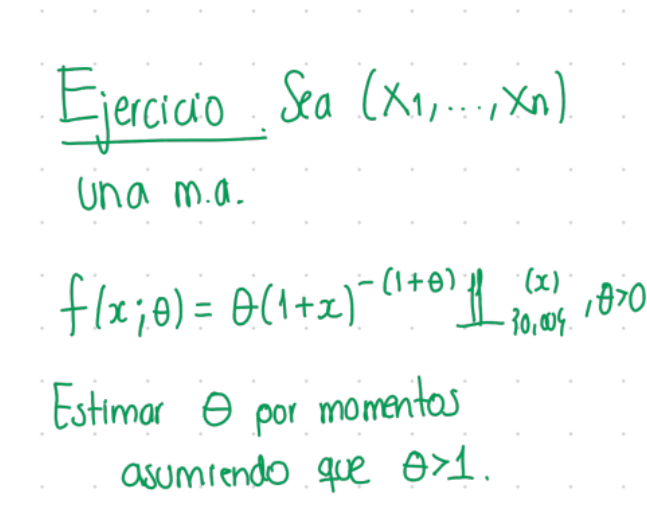

Solución 

Sabemos que, $f(x) = \theta (1 + x)^{-(1 + \theta)}, \quad x \geq 0, \, \theta > 1$

$ E[X]$ se calcula como:

$
E[X] = \int_0^\infty x \cdot f(x) \, dx$

Sustituyendo la función de densidad $ f(x) $:

$
E[X] = \int_0^\infty x \cdot \theta (1 + x)^{-(1 + \theta)} \, dx$

Hacemos el cambio de variable $ u = 1 + x $, de modo que $ du = dx $ y $x = u - 1 $. La integral se convierte en:

$E[X] = \int_1^\infty (u - 1) \cdot \theta u^{-(1 + \theta)} \, du$

Distribuimos:

$E[X] = \theta \left( \int_1^\infty u^{-(\theta)} \, du - \int_1^\infty u^{-(1 + \theta)} \, du \right)$

Las integrales conocidas son:

$
\int_1^\infty u^{-\theta} \, du = \frac{1}{\theta}, \quad \int_1^\infty u^{-(1 + \theta)} \, du = \frac{1}{\theta + 1}$

Por lo tanto, el valor esperado es:

$
E[X] = \theta \left( \frac{1}{\theta} - \frac{1}{\theta + 1} \right)
$

Simplificando:

$
E[X] = 1 - \frac{\theta}{\theta + 1}$

$
E[X] = \frac{1}{\theta - 1}
$


Si $E[x]=\frac{1}{n}\sum x_i$

Igualamos $\frac{1}{n}\sum x_i =\frac{1}{\theta -1}$

$\bar{x} =\frac{1}{\theta - 1}$

$\hat{\theta}=\frac{1}{\bar{x}}+1$